In [2]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, MaxPooling2D, Flatten, Conv2D
import random

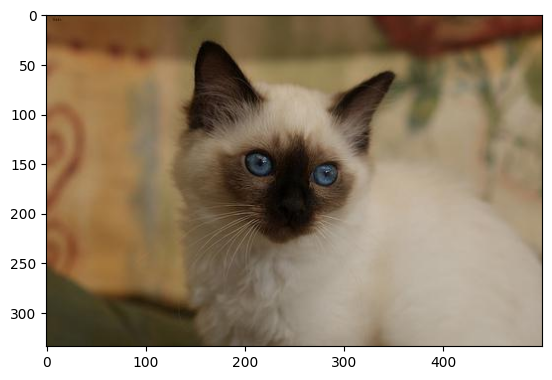

In [3]:
img =  image.load_img('val/cat/Birman_122_jpg.rf.fde0eb5341b00fbd3ffa714d893de215.jpg')
plt.imshow(img)

In [4]:
cv2.imread('val/cat/Birman_122_jpg.rf.fde0eb5341b00fbd3ffa714d893de215.jpg')
cv2.imread('val/cat/Birman_122_jpg.rf.fde0eb5341b00fbd3ffa714d893de215.jpg').shape

(334, 500, 3)

GENERATE THE DATA SET FOR TRAINING/VALIDATION.
DEVIDE BY 255 TO MAKE OUR DATA RANGE FROM 0 TO 1

In [5]:
train =ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale= 1/255)

In [6]:
train_dataset = train.flow_from_directory('C:\\Users\\John\\PycharmProjects\\ML\\catsdogextract\\train',
                                          target_size= (200, 200),
                                          batch_size = 64, class_mode = 'binary')

validation_dataset = train.flow_from_directory('C:\\Users\\John\\PycharmProjects\\ML\\catsdogextract\\val',
                                          target_size= (200, 200),
                                          batch_size = 64, class_mode = 'binary')

Found 275 images belonging to 2 classes.
Found 70 images belonging to 2 classes.


In [7]:
train_dataset.class_indices
validation_dataset.class_indices

{'cat': 0, 'dog': 1}

In [8]:
train_labels = train_dataset.classes
train_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [9]:
val_labels =validation_dataset.classes
val_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [10]:
#define ur model
model = Sequential([
    Conv2D(16, (3,3), activation  = 'relu', input_shape = (200, 200, 3)),
    MaxPooling2D((2,2)),
    
    Conv2D(32, (3,3), activation  = 'relu'),
    MaxPooling2D((2,2)),
    
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

C:\Users\John\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'] )


C:\Users\John\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/6
5/5 ━━━━━━━━━━━━━━━━━━━━ 56s 11s/step - accuracy: 0.5898 - loss: 3.8727 - val_accuracy: 0.4286 - val_loss: 0.7457
Epoch 2/6
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.5061 - loss: 0.9887 - val_accuracy: 0.6571 - val_loss: 0.9211
Epoch 3/6
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 2s/step - accuracy: 0.6652 - loss: 0.7659 - val_accuracy: 0.6429 - val_loss: 0.6530
Epoch 4/6
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.6920 - loss: 0.6297 - val_accuracy: 0.6571 - val_loss: 0.6625
Epoch 5/6
5/5 ━━━━━━━━━━━━━━━━━━━━ 10s 2s/step - accuracy: 0.6684 - loss: 0.5635 - val_accuracy: 0.6286 - val_loss: 0.6589
Epoch 6/6
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.7254 - loss: 0.5245 - val_accuracy: 0.6429 - val_loss: 0.6762


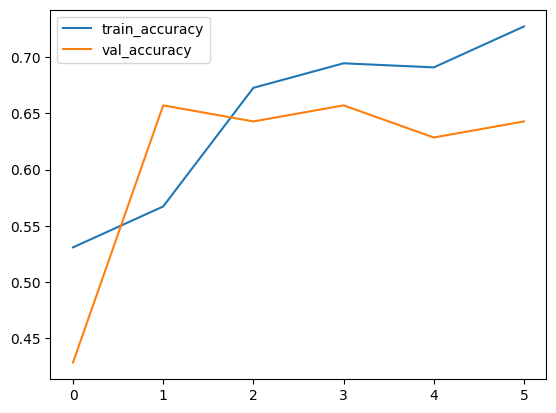

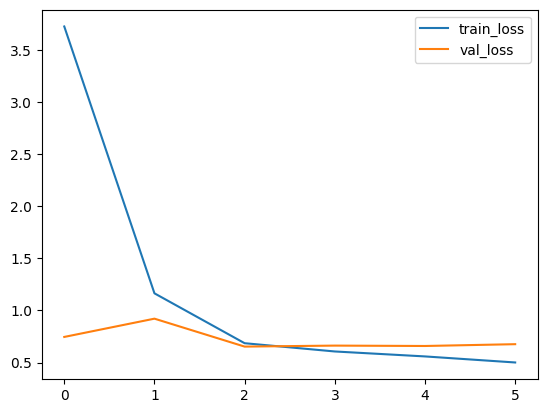

In [12]:
history= model.fit(train_dataset,  epochs= 6,validation_data=validation_dataset )

# Accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()


Continue learning

Epoch 1/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.7648 - loss: 0.4585 - val_accuracy: 0.6429 - val_loss: 0.6828
Epoch 2/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.8333 - loss: 0.3942 - val_accuracy: 0.6714 - val_loss: 0.6669
Epoch 3/3
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 2s/step - accuracy: 0.8556 - loss: 0.3559 - val_accuracy: 0.5571 - val_loss: 0.6879


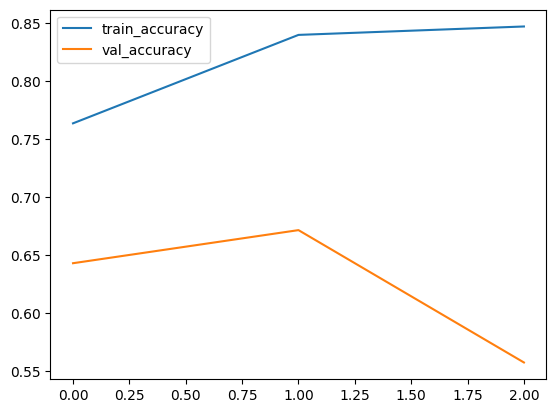

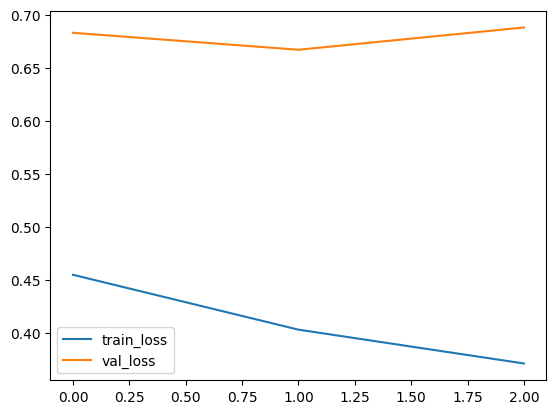

In [13]:
history = model.fit(train_dataset, epochs=3, validation_data=validation_dataset)
# Accuracy
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [14]:
model.evaluate(validation_dataset)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5537 - loss: 0.6921 


[0.6878529787063599, 0.5571428537368774]

Single image

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
[[0.9049747]]


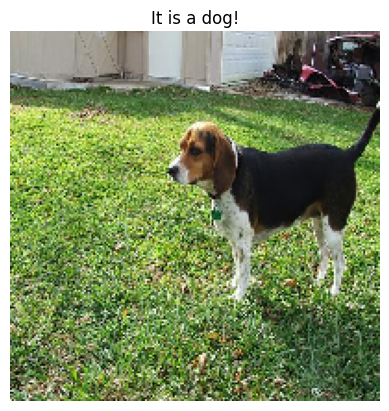

In [23]:

image_path = 'train/dog/beagle_158_jpg.rf.04a46b03d363e469491cc58137f3cc66.jpg'
img = image.load_img(image_path, target_size=(200, 200))  #resizing
img_array = image.img_to_array(img)  #numpy array conversion
img_array = np.expand_dims(img_array, axis=0)  #dimension batch
img_array /= 255.0  # Scaling the image data to be between 0 and 1

prediction = model.predict(img_array)
print(prediction)

if prediction < 0.5:
    res = ('It is a cat!')
else:
    res = ('It is a dog!')


plt.imshow(img) 
plt.axis('off') 
plt.title(res) 
plt.show() 

Multiple images using Random function

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
[[0.7894484]]
rate is : 150


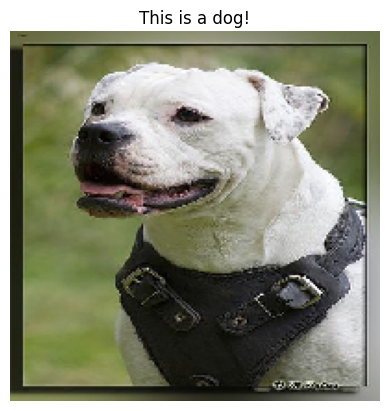

In [20]:
import pyttsx3
test_dir = r'C:\Users\John\PycharmProjects\ML\catsdogextract\test'
images = os.listdir(test_dir)
random_image = random.choice(images)
image_path = os.path.join(test_dir, random_image)

img = image.load_img(image_path, target_size=(200, 200))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

prediction = model.predict(img_array)
print(prediction)

if prediction < 0.5:
    result ='This is a cat!'
else:
    result = 'This is a dog!'
    
engine = pyttsx3.init()
# Get the current speech rate
rate = engine.getProperty('rate')
print(f"rate is : {rate}")
# Set the speech rate (lower value for slower speech)
engine.setProperty('rate', rate - 60) 
engine.say(result)
engine.runAndWait()
engine.stop()


plt.imshow(img)
plt.axis('off')
plt.title(result)
plt.show()
